# Récupérer un dataset Roboflow

## Function definitions

In [1]:
#TODO : Add check si pas install avant

%pip install roboflow==0.2.29
%pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 4.8 MB/s eta 0:00:006.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 11.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=9cfe79f0c65a3b4d0d5f83e5693cd7dcae09e81eacc6254597db50c480a64c3a
  Stored in directory: /home/xaelee/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget
  Attempting uninstall: pyparsing
    Foun

In [7]:
from roboflow import Roboflow
import ultralytics

In [4]:
def dl_roboflow_dataset(ver):
    
    rf = Roboflow(api_key="REDACTED")
    project = rf.workspace("naia-science").project("dataset-vipare")
    dataset = project.version(ver).download("yolov8")

    #TODO : switch to python calls instead of 
    !mkdir datasets
    !mv ./Dataset-ViPARE-$ver/ ./datasets/Dataset-ViPARE-$ver/
    !mv ./datasets/Dataset-ViPARE-$ver/data.yaml ./datasets/data.yaml

In [9]:
def define_and_train():
    #N pour nano le plus poti
    model = ultralytics.YOLO('yolov8n-seg.pt')
    %cd ./datasets
    results = model.train(batch=8,
                        device="cpu",
                        data="./data.yaml",
                        epochs=1,)
    return model

In [30]:
import os, random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_test_image_seg_Rob(ver, path):
    im_path = os.path.join(path, 'Dataset-ViPARE-' + str(ver) + '/valid/images/')
    lab_path = os.path.join(path, 'Dataset-ViPARE-' + str(ver) + '/valid/labels/')
    
    #get random image from image directory
    image = random.choice(os.listdir(im_path))

    #get associated label by removing .jpg, adding .txt
    label = os.path.splitext(image)[0] + '.txt'

    #display image at im_path + image using plt
    
    img = mpimg.imread(im_path + image)
    imgplot = plt.imshow(img)

    #draw segmentation from label at lab_path + label using plt - it is a polygon, not a rectangle

    with open(lab_path + label, 'r') as f:
        for line in f:
            polygon = line.split()[1:]
            polygon = [float(i) for i in polygon]

            #reshape polygon to be a list of tuples, each tuple being a point and knowing polygon values are between 0 and 1, need to multiply by image size
            polygon = [(int(polygon[i]*img.shape[1]), int(polygon[i+1]*img.shape[0])) for i in range(0, len(polygon), 2)]
            #draw polygon
            plt.fill(*zip(*polygon), 'r')
    plt.show()



In [ ]:
def delete_roboflow_dataset():
    !rm -rf ./datasets/

## Exemple d'utilisation

In [5]:
dl_roboflow_dataset(2)

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.196, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Dataset-ViPARE-2 in yolov8:: 100%|██████████| 849/849 [00:00<00:00, 7226.16it/s]


In [10]:
# On check juste si on peut bien train le modèle, et qu'il arrive bien à load/accéder au dataset
model = define_and_train()

100%|██████████| 6.73M/6.73M [00:00<00:00, 33.1MB/s]
using bookmarks requires you to install the `pickleshare` library.
New https://pypi.org/project/ultralytics/8.1.15 available 😃 Update with 'pip install -U ultralytics'


[Errno 2] No such file or directory: './datasets'
/home/xaelee/Documents/datasetManipulation/Notebooks/datasets


Ultralytics YOLOv8.0.196 🚀 Python-3.11.6 torch-2.2.0+cu121 CPU (AMD Ryzen 5 5625U with Radeon Graphics)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=./data.yaml, epochs=1, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, op

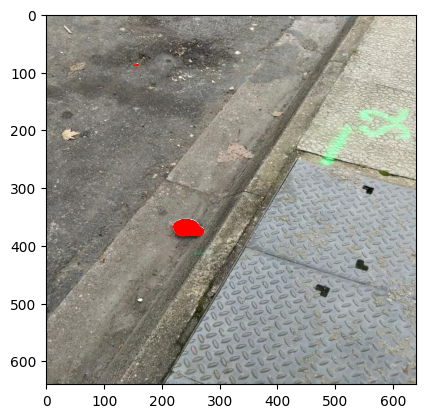

In [56]:
display_test_image_seg_Rob(2, './datasets/')

In [ ]:
delete_roboflow_dataset()